In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [2]:
os.chdir('c:\\Users\\quinn\\Sberbank') 

In [3]:
train=pd.read_csv('trainVariables2.csv')

In [4]:
train.head()

,full_sq,floor,green_zone_part,healthcare_centers_raion,kremlin_km,sport_objects_raion,raion_popul,price_doc
0,43,4.0,0.19,1,15.2,7,155572,5850000
1,34,3.0,0.37,1,8.7,6,115352,6000000
2,43,2.0,0.11,1,9.1,5,101708,5700000
3,89,9.0,0.19,1,19.5,17,178473,13100000
4,77,4.0,0.02,4,2.6,25,108171,16331452


In [5]:
train.describe(include='all')

,full_sq,floor,green_zone_part,healthcare_centers_raion,kremlin_km,sport_objects_raion,raion_popul,price_doc
count,30471.000000,30304.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,54.214269,7.670803,0.219337,1.320895,16.045020,6.635030,84056.425552,7.123035e+06
std,38.031487,5.319989,0.175063,1.492903,8.438752,6.571982,57871.285899,4.780111e+06
min,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,2546.000000,1.000000e+05
25%,38.000000,3.000000,0.060000,0.000000,10.500000,1.000000,21819.000000,4.740002e+06
50%,49.000000,6.500000,0.170000,1.000000,14.900000,5.000000,83502.000000,6.274411e+06
75%,63.000000,11.000000,0.340000,2.000000,20.700000,10.000000,122862.000000,8.300000e+06
max,5326.000000,77.000000,0.850000,6.000000,70.700000,29.000000,247469.000000,1.111111e+08


In [6]:
train.info

<bound method DataFrame.info of        full_sq  floor  green_zone_part  healthcare_centers_raion  kremlin_km  \
0           43    4.0             0.19                         1        15.2   
1           34    3.0             0.37                         1         8.7   
2           43    2.0             0.11                         1         9.1   
3           89    9.0             0.19                         1        19.5   
4           77    4.0             0.02                         4         2.6   
5           67   14.0             0.01                         0         5.6   
6           25   10.0             0.52                         3         6.5   
7           44    5.0             0.19                         1        15.8   
8           42    5.0             0.04                         4        10.4   
9           36    9.0             0.07                         0        10.9   
10          36   12.0             0.02                         1        17.1   
11      

In [7]:
train.isnull().sum()

full_sq                       0
floor                       167
green_zone_part               0
healthcare_centers_raion      0
kremlin_km                    0
sport_objects_raion           0
raion_popul                   0
price_doc                     0
dtype: int64

In [8]:
train['floor'].median()

6.5

In [9]:
train.fillna(train.median(), inplace = True)

In [10]:
train.isnull().sum()

full_sq                     0
floor                       0
green_zone_part             0
healthcare_centers_raion    0
kremlin_km                  0
sport_objects_raion         0
raion_popul                 0
price_doc                   0
dtype: int64

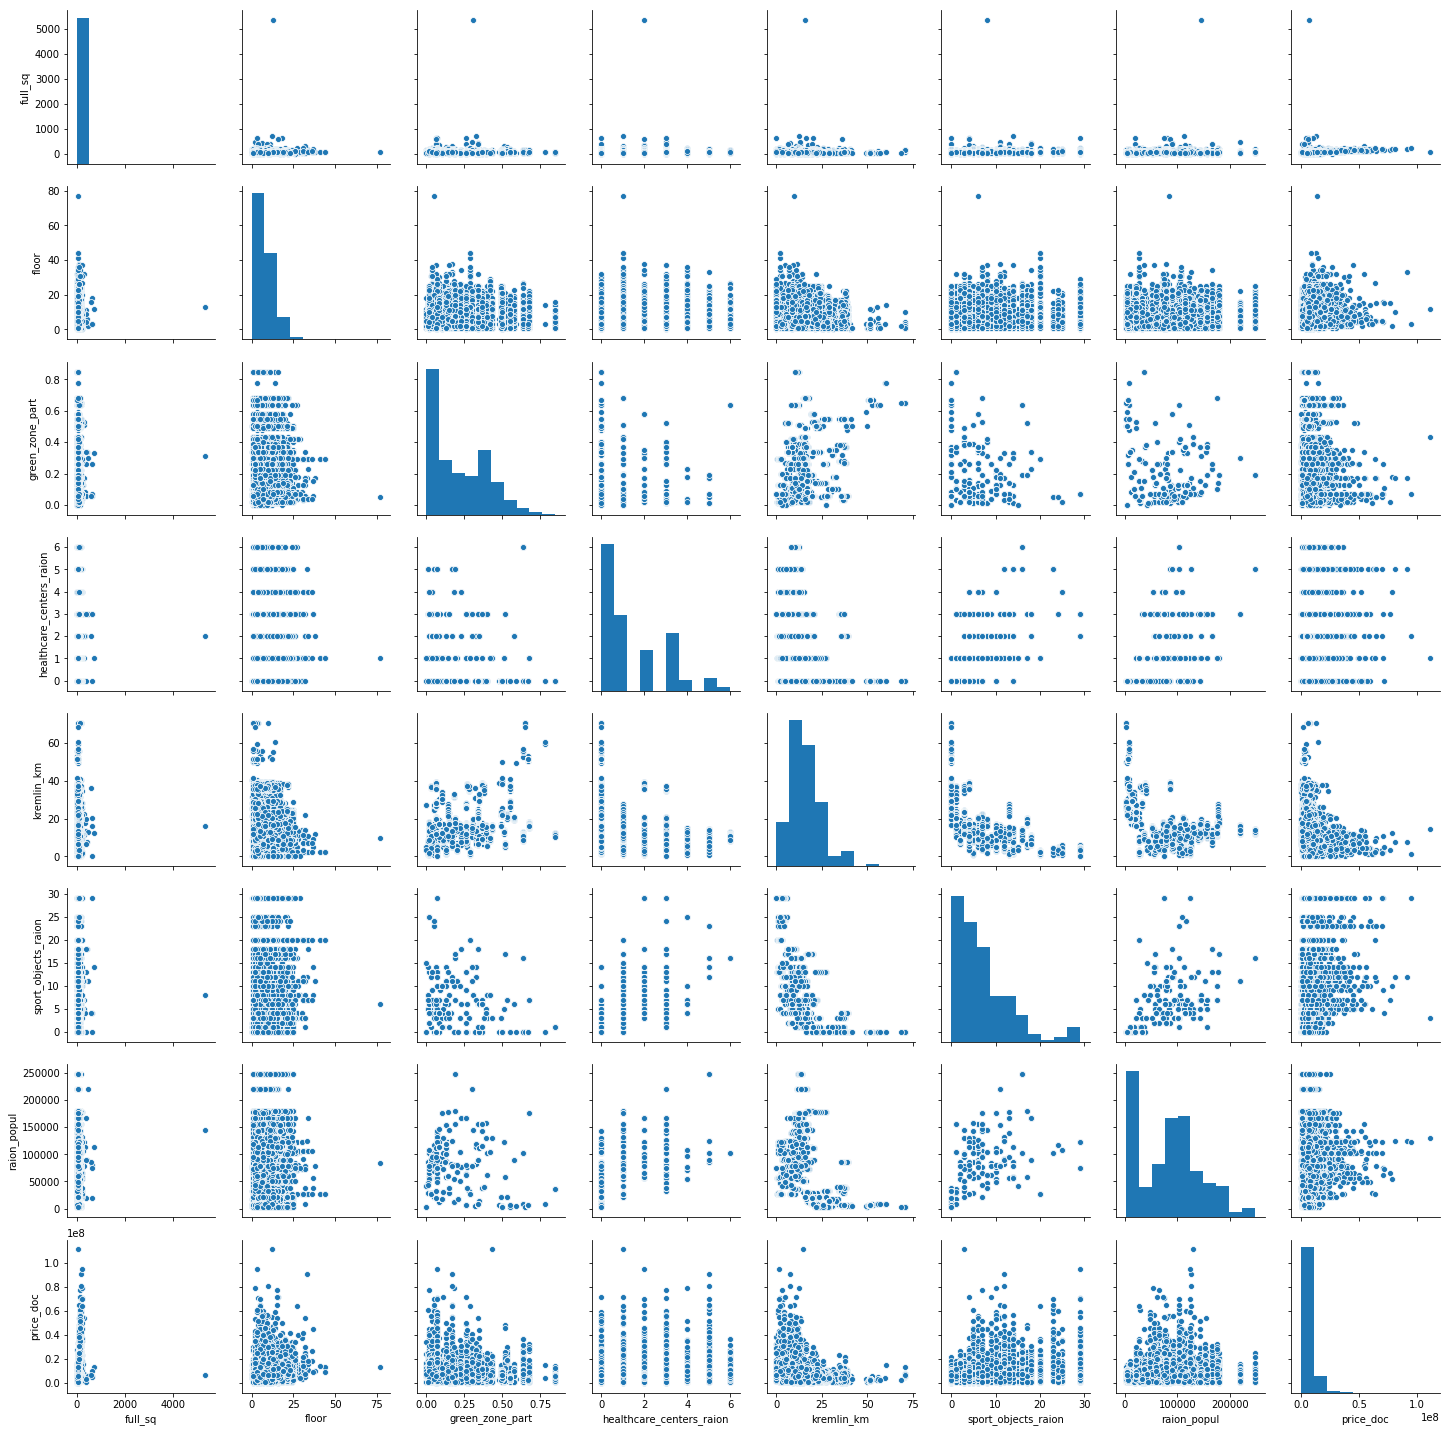

In [11]:
sns.pairplot(train)

In [12]:
train.describe(include='all')

,full_sq,floor,green_zone_part,healthcare_centers_raion,kremlin_km,sport_objects_raion,raion_popul,price_doc
count,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,54.214269,7.664386,0.219337,1.320895,16.045020,6.635030,84056.425552,7.123035e+06
std,38.031487,5.306094,0.175063,1.492903,8.438752,6.571982,57871.285899,4.780111e+06
min,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,2546.000000,1.000000e+05
25%,38.000000,3.000000,0.060000,0.000000,10.500000,1.000000,21819.000000,4.740002e+06
50%,49.000000,6.500000,0.170000,1.000000,14.900000,5.000000,83502.000000,6.274411e+06
75%,63.000000,11.000000,0.340000,2.000000,20.700000,10.000000,122862.000000,8.300000e+06
max,5326.000000,77.000000,0.850000,6.000000,70.700000,29.000000,247469.000000,1.111111e+08


In [13]:
train.corr()

,full_sq,floor,green_zone_part,healthcare_centers_raion,kremlin_km,sport_objects_raion,raion_popul,price_doc
full_sq,1.000000,0.089085,0.031106,-0.007840,0.031160,0.028109,-0.038929,0.341840
floor,0.089085,1.000000,0.001234,-0.076201,0.045046,-0.035449,-0.046375,0.117499
green_zone_part,0.031106,0.001234,1.000000,-0.191757,0.366466,-0.239343,-0.209008,-0.095498
healthcare_centers_raion,-0.007840,-0.076201,-0.191757,1.000000,-0.458961,0.571788,0.512199,0.190006
kremlin_km,0.031160,0.045046,0.366466,-0.458961,1.000000,-0.596015,-0.397209,-0.279264
sport_objects_raion,0.028109,-0.035449,-0.239343,0.571788,-0.596015,1.000000,0.537383,0.252794
raion_popul,-0.038929,-0.046375,-0.209008,0.512199,-0.397209,0.537383,1.000000,0.151587
price_doc,0.341840,0.117499,-0.095498,0.190006,-0.279264,0.252794,0.151587,1.000000


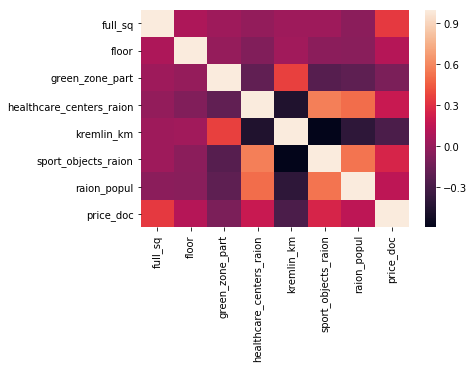

In [14]:
sns.heatmap(train.corr())

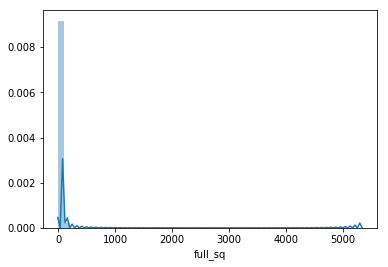

In [15]:
sns.distplot(train['full_sq'])

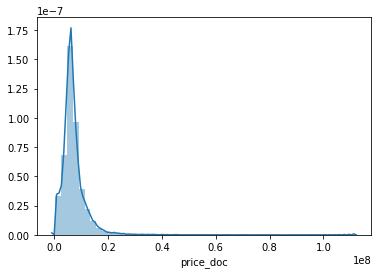

In [16]:
sns.distplot(train['price_doc'])

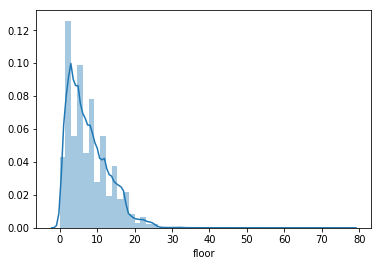

In [17]:
sns.distplot(train['floor'])

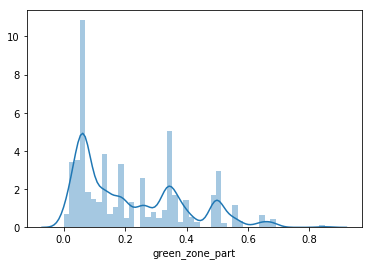

In [18]:
sns.distplot(train['green_zone_part'])

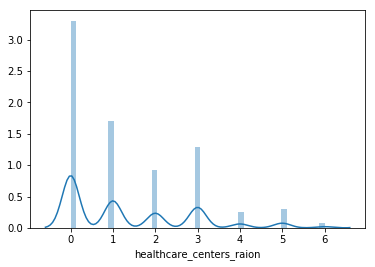

In [19]:
sns.distplot(train['healthcare_centers_raion'])

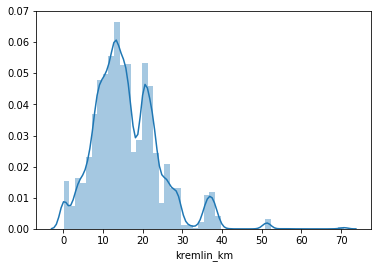

In [20]:
sns.distplot(train['kremlin_km'])

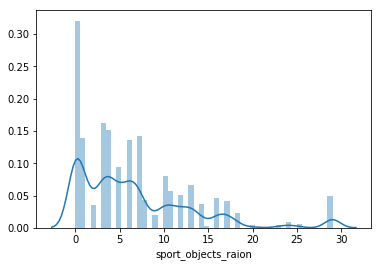

In [21]:
sns.distplot(train['sport_objects_raion'])

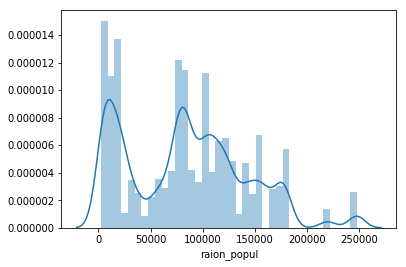

In [22]:
sns.distplot(train['raion_popul'])

In [23]:
#remove top 1% of outliers

In [24]:
q=train['full_sq'].quantile(.99)
data_1=train[train['full_sq']<q]

In [25]:
r=data_1['floor'].quantile(.99)
data_2=data_1[data_1['floor']<r]

In [26]:
s=data_2['green_zone_part'].quantile(.99)
data_3=data_2[data_2['green_zone_part']<s]

In [27]:
t=data_3['kremlin_km'].quantile(.99)
data_4=data_3[data_3['kremlin_km']<t]

In [28]:
u=data_4['price_doc'].quantile(.99)
data_5=data_4[data_4['price_doc']<u]

In [29]:
data_5.describe(include='all')

,full_sq,floor,green_zone_part,healthcare_centers_raion,kremlin_km,sport_objects_raion,raion_popul,price_doc
count,28724.000000,28724.000000,28724.000000,28724.000000,28724.000000,28724.000000,28724.000000,2.872400e+04
mean,52.173827,7.452218,0.212048,1.326069,15.669099,6.604790,84192.348489,6.735754e+06
std,17.564332,4.902562,0.165239,1.499551,7.539068,6.507812,57783.509531,3.346458e+06
min,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,2546.000000,1.000000e+05
25%,38.000000,3.000000,0.060000,0.000000,10.500000,1.000000,21819.000000,4.740000e+06
50%,48.000000,6.000000,0.160000,1.000000,14.800000,5.000000,83502.000000,6.218370e+06
75%,62.000000,11.000000,0.340000,2.000000,20.500000,10.000000,122862.000000,8.100000e+06
max,133.000000,22.000000,0.640000,6.000000,37.800000,29.000000,247469.000000,2.172608e+07


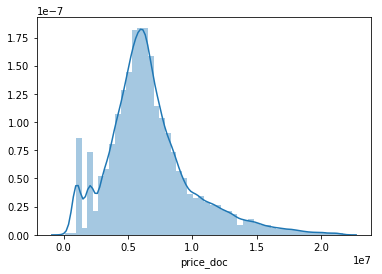

In [30]:
sns.distplot(data_5['price_doc'])

In [31]:
new_data=data_5.reset_index(drop=True)

In [32]:
new_data.describe(include='all')

,full_sq,floor,green_zone_part,healthcare_centers_raion,kremlin_km,sport_objects_raion,raion_popul,price_doc
count,28724.000000,28724.000000,28724.000000,28724.000000,28724.000000,28724.000000,28724.000000,2.872400e+04
mean,52.173827,7.452218,0.212048,1.326069,15.669099,6.604790,84192.348489,6.735754e+06
std,17.564332,4.902562,0.165239,1.499551,7.539068,6.507812,57783.509531,3.346458e+06
min,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,2546.000000,1.000000e+05
25%,38.000000,3.000000,0.060000,0.000000,10.500000,1.000000,21819.000000,4.740000e+06
50%,48.000000,6.000000,0.160000,1.000000,14.800000,5.000000,83502.000000,6.218370e+06
75%,62.000000,11.000000,0.340000,2.000000,20.500000,10.000000,122862.000000,8.100000e+06
max,133.000000,22.000000,0.640000,6.000000,37.800000,29.000000,247469.000000,2.172608e+07


In [33]:
log_price=np.log(new_data['price_doc'])
new_data['log_price'] = log_price

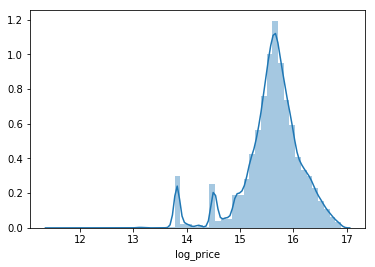

In [34]:
sns.distplot(new_data['log_price'])

In [35]:
new_data.head()

,full_sq,floor,green_zone_part,healthcare_centers_raion,kremlin_km,sport_objects_raion,raion_popul,price_doc,log_price
0,43,4.0,0.19,1,15.2,7,155572,5850000,15.581952
1,34,3.0,0.37,1,8.7,6,115352,6000000,15.607270
2,43,2.0,0.11,1,9.1,5,101708,5700000,15.555977
3,89,9.0,0.19,1,19.5,17,178473,13100000,16.388123
4,77,4.0,0.02,4,2.6,25,108171,16331452,16.608603


In [36]:
new_data.drop(['log_price'], axis = 1, inplace = True)

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = new_data [['full_sq', 'floor', 'green_zone_part', 'healthcare_centers_raion', 
                           'kremlin_km', 'sport_objects_raion', 'raion_popul']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [38]:
vif

,VIF,features
0,7.576177,full_sq
1,3.292782,floor
2,2.999524,green_zone_part
3,2.955633,healthcare_centers_raion
4,6.403951,kremlin_km
5,3.927837,sport_objects_raion
6,4.556483,raion_popul


In [39]:
new_data.head()

,full_sq,floor,green_zone_part,healthcare_centers_raion,kremlin_km,sport_objects_raion,raion_popul,price_doc
0,43,4.0,0.19,1,15.2,7,155572,5850000
1,34,3.0,0.37,1,8.7,6,115352,6000000
2,43,2.0,0.11,1,9.1,5,101708,5700000
3,89,9.0,0.19,1,19.5,17,178473,13100000
4,77,4.0,0.02,4,2.6,25,108171,16331452


In [40]:
x=new_data.iloc[:, :-1].values
y=new_data.iloc[:, -1].values

In [41]:
#no need to feature scale in mult lin regress because of coefficients

In [42]:
#train and test split 

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

In [44]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
#predict the test set

In [46]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test), 1)), 1))

[[5787799.57 6940000.  ]
 [7289395.4  7579575.  ]
 [7169804.47 5900000.  ]
 ...
 [3129931.71 3445200.  ]
 [4856239.72 3196725.  ]
 [5618693.03 5909900.  ]]


In [47]:
#plot residuals

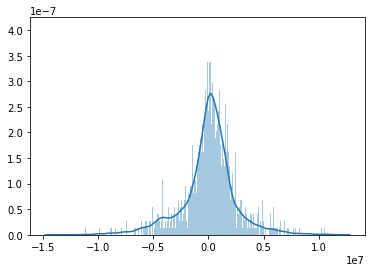

In [48]:
sns.distplot((y_test-y_pred), bins = 2000)

In [49]:
from sklearn import metrics

In [50]:
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE 2495703.479297422


In [51]:
regressor.coef_

array([ 1.10e+05,  3.20e+04,  1.64e+05,  1.17e+05, -1.31e+05, -2.37e+04,
        7.59e+00])

In [52]:
#R-sqr

In [55]:
metrics.r2_score(y_test, y_pred)

0.43569429170519025